In [1]:
import os
os.environ['PROJ_LIB'] = '/home/brogalla/anaconda3/share/proj'

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import os
from itertools import compress
import datetime as dt

%matplotlib inline

In [3]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

##### Load domain dimensions for reference:

In [4]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = np.array(mask.variables['tmask'])
cond = (tmask[0,:,:,:] > 0.1) 
land_mask = np.ma.masked_where(cond, tmask[0,:,:,:]) 
tmask = tmask[0,:,1480:2050,160:800]

In [5]:
mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

In [6]:
tmask_full = np.empty((12,50,570,640))
tmask_full[:] = tmask

In [7]:
ref   = nc.Dataset('/data/brogalla/run_storage/trial4/ref-2002/ANHA12_EXH006_2002_monthly.nc',  'r')
tlons = np.array(ref.variables['nav_lon'])
tlats = np.array(ref.variables['nav_lat'])
lons  = np.array(ref.variables['nav_lon'])#[1480:2050,160:800]
lats  = np.array(ref.variables['nav_lat'])#[1480:2050,160:800]
depth = np.array(ref.variables['deptht'])

##### Load Mn model run results:

In [8]:
folder  = '/data/brogalla/run_storage/riv-2a/'
folder1 = '/data/brogalla/run_storage/riv-2b/'
folder2 = '/data/brogalla/run_storage/reference/'
file6   = 'ANHA12_EXH006_2007_monthly.nc'
file7   = 'ANHA12_EXH006_2008_monthly.nc'
file8   = 'ANHA12_EXH006_2009_monthly.nc'
file9   = 'ANHA12_EXH006_2010_monthly.nc'
file10  = 'ANHA12_EXH006_2011_monthly.nc'
file11  = 'ANHA12_EXH006_2012_monthly.nc'
file12  = 'ANHA12_EXH006_2013_monthly.nc'
file13  = 'ANHA12_EXH006_2014_monthly.nc'
file14  = 'ANHA12_EXH006_2015_monthly.nc'
file15  = 'ANHA12_EXH006_2016_monthly.nc'
file16  = 'ANHA12_EXH006_2017_monthly.nc'
file17  = 'ANHA12_EXH006_2018_monthly.nc'

In [9]:
cont_monthly6 = nc.Dataset(folder1+file6)
cont_monthly7 = nc.Dataset(folder1+file7)
cont_monthly8 = nc.Dataset(folder1+file8)
cont_monthly9 = nc.Dataset(folder1+file9)
cont_monthly10 = nc.Dataset(folder1+file10)
cont_monthly11 = nc.Dataset(folder1+file11)
cont_monthly12 = nc.Dataset(folder1+file12)
cont_monthly13 = nc.Dataset(folder1+file13)
cont_monthly14 = nc.Dataset(folder1+file14)
cont_monthly15 = nc.Dataset(folder1+file15)
cont_monthly16 = nc.Dataset(folder1+file16)
cont_monthly17 = nc.Dataset(folder1+file17)

base_monthly6 = nc.Dataset(folder2+file6)
base_monthly7 = nc.Dataset(folder2+file7)
base_monthly8 = nc.Dataset(folder2+file8)
base_monthly9 = nc.Dataset(folder2+file9)
base_monthly10 = nc.Dataset(folder2+file10)
base_monthly11 = nc.Dataset(folder2+file11)
base_monthly12 = nc.Dataset(folder2+file12)
base_monthly13 = nc.Dataset(folder2+file13)
base_monthly14 = nc.Dataset(folder2+file14)
base_monthly15 = nc.Dataset(folder2+file15)
base_monthly16 = nc.Dataset(folder2+file16)
base_monthly17 = nc.Dataset(folder2+file17)

In [10]:
dmn_cont_2007 = np.array(cont_monthly6.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2008 = np.array(cont_monthly7.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2009 = np.array(cont_monthly8.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2010 = np.array(cont_monthly9.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2011 = np.array(cont_monthly10.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2012 = np.array(cont_monthly11.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2013 = np.array(cont_monthly12.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2014 = np.array(cont_monthly13.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2015 = np.array(cont_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2016 = np.array(cont_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2017 = np.array(cont_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2018 = np.array(cont_monthly17.variables['dissolmn'])[:,0,:,:,:]

dmn_base_2007 = np.array(base_monthly6.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2008 = np.array(base_monthly7.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2009 = np.array(base_monthly8.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2010 = np.array(base_monthly9.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2011 = np.array(base_monthly10.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2012 = np.array(base_monthly11.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2013 = np.array(base_monthly12.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2014 = np.array(base_monthly13.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2015 = np.array(base_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2016 = np.array(base_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2017 = np.array(base_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2018 = np.array(base_monthly17.variables['dissolmn'])[:,0,:,:,:]

Calculate the proportional contribution of glacial rivers to each grid cell:

$$ prop = \frac{Mn_{glacier}-Mn_{base}}{Mn_{base}} = \frac{Mn_{glacier}}{Mn_{base}} - 1 $$

In [11]:
def calculate_prop(dmn_riv_off, dmn_riv_on):
    # Input arguments:
    # - dmn_riv_on (t,z,y,x) --- concentration of dMn with riverine contribution on
    # - dmn_riv_off(t,z,y,x) --- concentration of dMn with rivers off
    
    diff_rivers = dmn_riv_on - dmn_riv_off
    
    # Contribution of rivers / total concentration (with rivers on):
    # should be an elementwise operation
    prop_river  = np.divide(diff_rivers, dmn_riv_off)
    
    # Output:
    # - prop_river(t,z,y,x)  --- proportional contribution of river to observed [dMn]
    return prop_river

In [12]:
cont_prop_2007   = calculate_prop(dmn_base_2007, dmn_cont_2007)
cont_prop_2008   = calculate_prop(dmn_base_2008, dmn_cont_2008)
cont_prop_2009   = calculate_prop(dmn_base_2009, dmn_cont_2009)
cont_prop_2010   = calculate_prop(dmn_base_2010, dmn_cont_2010)
cont_prop_2011   = calculate_prop(dmn_base_2011, dmn_cont_2011)
cont_prop_2012   = calculate_prop(dmn_base_2012, dmn_cont_2012)
cont_prop_2013   = calculate_prop(dmn_base_2013, dmn_cont_2013)
cont_prop_2014   = calculate_prop(dmn_base_2014, dmn_cont_2014)
cont_prop_2015   = calculate_prop(dmn_base_2015, dmn_cont_2015)
cont_prop_2016   = calculate_prop(dmn_base_2016, dmn_cont_2016)
cont_prop_2017   = calculate_prop(dmn_base_2017, dmn_cont_2017)
cont_prop_2018   = calculate_prop(dmn_base_2018, dmn_cont_2018)

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


# Top down look:

Average over the top meters

In [13]:
cont_2007 = np.nanmean(cont_prop_2007[:,0:10,:], axis=1)
cont_2008 = np.nanmean(cont_prop_2008[:,0:10,:], axis=1)
cont_2009 = np.nanmean(cont_prop_2009[:,0:10,:], axis=1)
cont_2010 = np.nanmean(cont_prop_2010[:,0:10,:], axis=1)
cont_2011 = np.nanmean(cont_prop_2011[:,0:10,:], axis=1)
cont_2012 = np.nanmean(cont_prop_2012[:,0:10,:], axis=1)
cont_2013 = np.nanmean(cont_prop_2013[:,0:10,:], axis=1)
cont_2014 = np.nanmean(cont_prop_2014[:,0:10,:], axis=1)
cont_2015 = np.nanmean(cont_prop_2015[:,0:10,:], axis=1)
cont_2016 = np.nanmean(cont_prop_2016[:,0:10,:], axis=1)
cont_2017 = np.nanmean(cont_prop_2017[:,0:10,:], axis=1)
cont_2018 = np.nanmean(cont_prop_2018[:,0:10,:], axis=1)

/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/brogalla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home

In [20]:
def plot_surface(cont_prop, year):
    fig, ax1 = plt.subplots(figsize=(14,5))

    proj2 = Basemap(projection='stere',lat_0 = 74.8, lon_0 = -99, resolution='i', width=1.85e6, height=0.60e6, ax=ax1)
    proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
    proj2.drawmeridians(np.arange(int(-140),int(-30),4),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

    x_land, y_land = proj2(lon, lat)
    proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
                   vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

    #---------------------
    x_model, y_model = proj2(lons, lats)
    CS = proj2.contourf(x_model, y_model, cont_prop[7,:,:]*100, 20, vmin=0, vmax=5, cmap=cmocean.cm.matter)

    cbaxes = fig.add_axes([0.95, 0.18, 0.04, 0.70]) 
    
    ax1.set_title(year)

    CBar = plt.colorbar(CS, ax=ax1, cax=cbaxes, ticks=[0, 1.0, 2.0, 3.0, 4.0, 5.0]) 

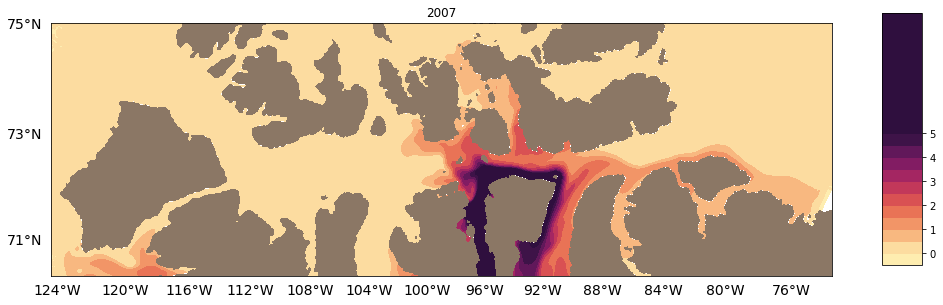

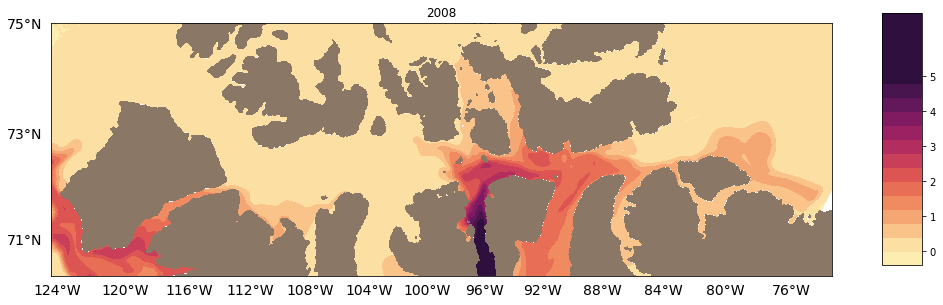

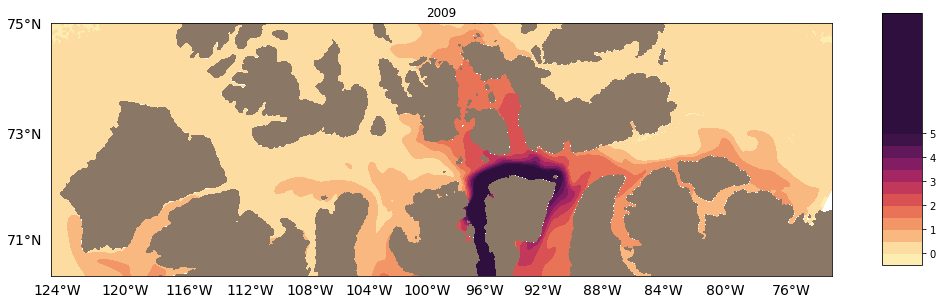

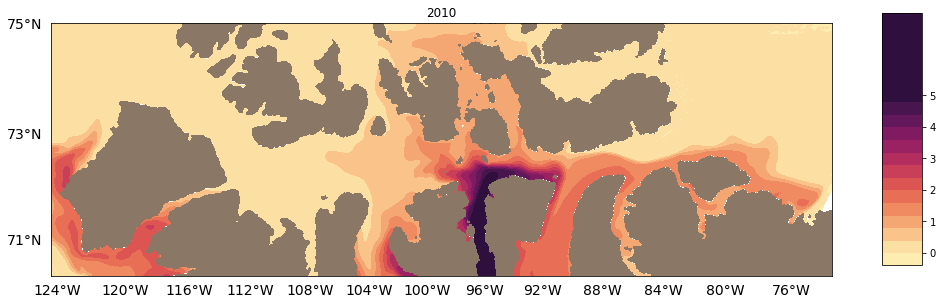

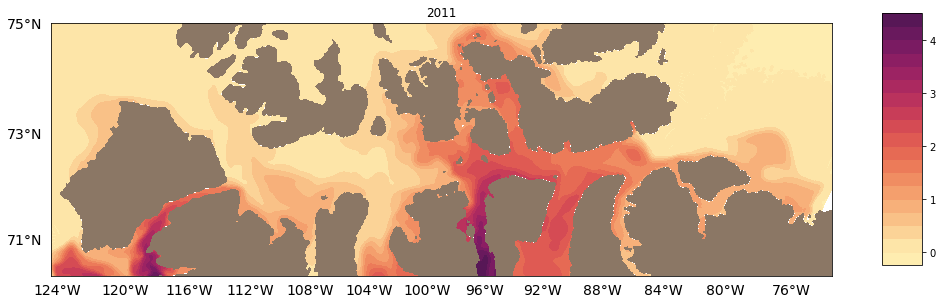

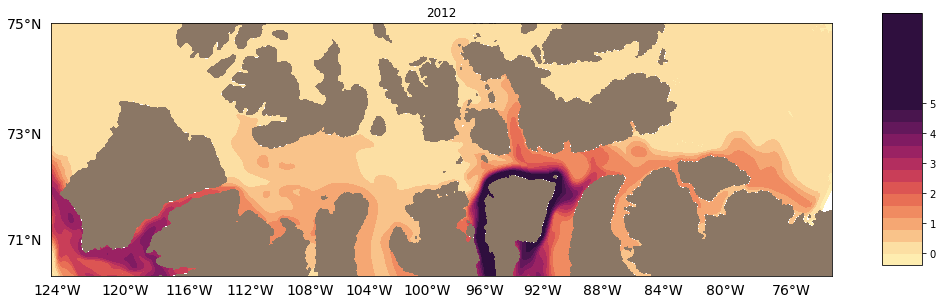

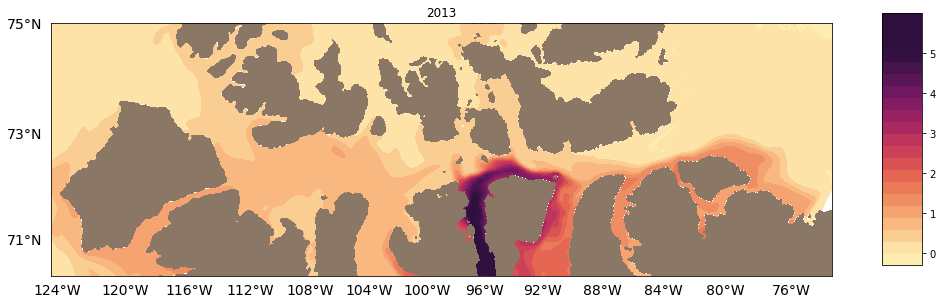

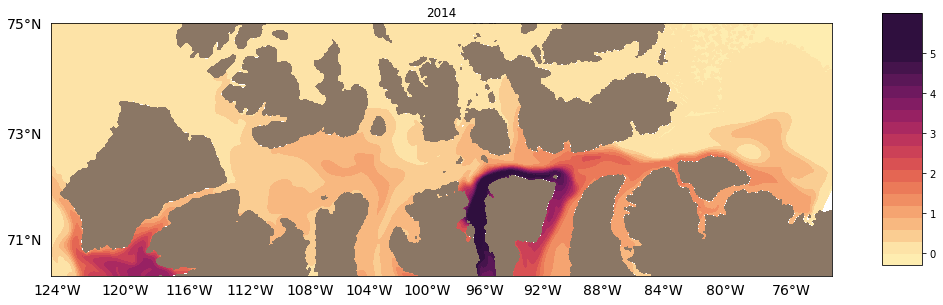

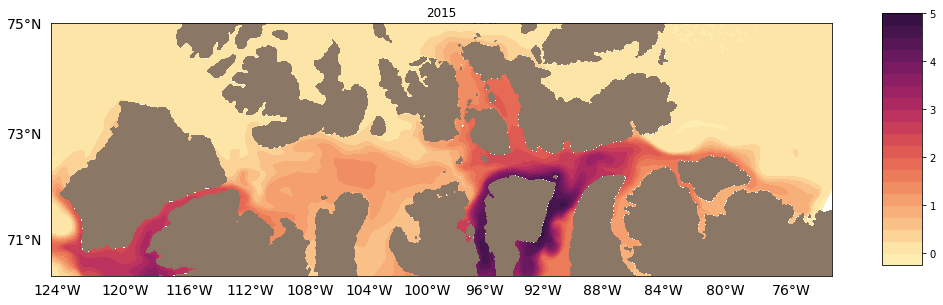

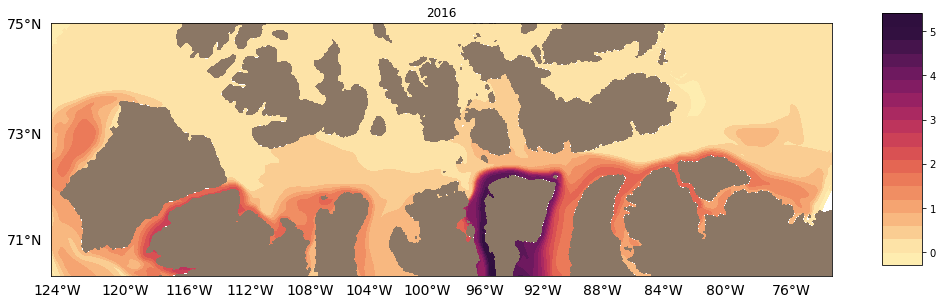

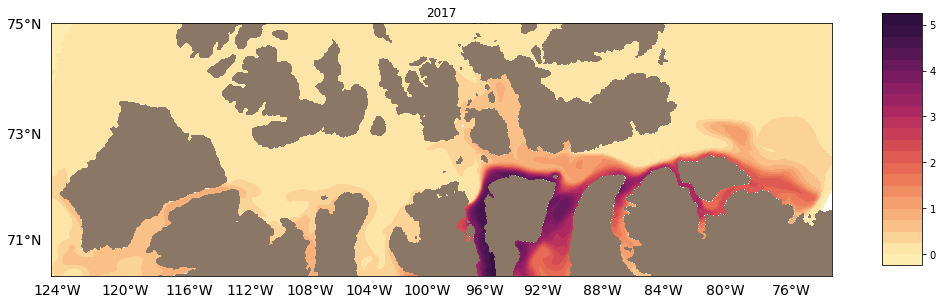

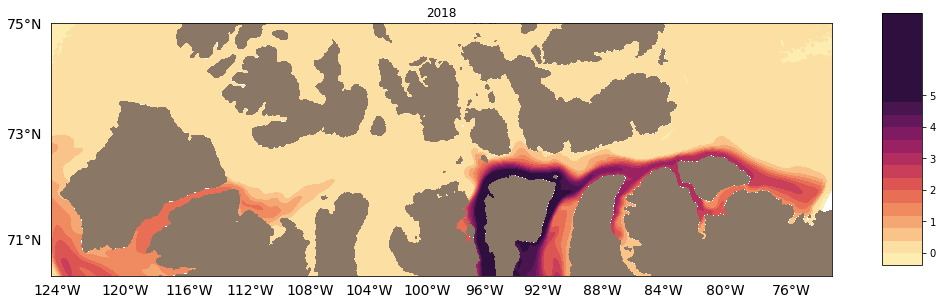

In [26]:
plot_surface(cont_2007, '2007')
plot_surface(cont_2008, '2008')
plot_surface(cont_2009, '2009')
plot_surface(cont_2010, '2010')
plot_surface(cont_2011, '2011')
plot_surface(cont_2012, '2012')
plot_surface(cont_2013, '2013')
plot_surface(cont_2014, '2014')
plot_surface(cont_2015, '2015')
plot_surface(cont_2016, '2016')
plot_surface(cont_2017, '2017')
plot_surface(cont_2018, '2018')

## Polynya presence:

In [15]:
folder  = '/data/brogalla/ANHA12/'
filei7    = 'ANHA12-EXH006_5d_icemod_y2007m08d03.nc'
filei8    = 'ANHA12-EXH006_5d_icemod_y2008m08d03.nc'
filei9    = 'ANHA12-EXH006_5d_icemod_y2009m08d03.nc'
filei10   = 'ANHA12-EXH006_5d_icemod_y2010m08d03.nc'
filei11   = 'ANHA12-EXH006_5d_icemod_y2011m08d03.nc'
filei12   = 'ANHA12-EXH006_5d_icemod_y2012m08d03.nc'
filei13   = 'ANHA12-EXH006_5d_icemod_y2013m08d03.nc'
filei14   = 'ANHA12-EXH006_5d_icemod_y2014m08d03.nc'
filei15   = 'ANHA12-EXH006_5d_icemod_y2015m08d03.nc'
filei16   = 'ANHA12-EXH006_5d_icemod_y2016m08d03.nc'
filei17   = 'ANHA12-EXH006_5d_icemod_y2017m08d03.nc'
filei18   = 'ANHA12-EXH006_5d_icemod_y2018m08d03.nc'

In [16]:
def load_variables(filename):
    a = nc.Dataset(folder+filename)
    
    # shape: (1, 2400, 1632)
    ice_d = np.array(a.variables['iicethic'][0])         # ice thickness (m)
    ice_conc = np.array(a.variables['ileadfra'][0])      # ice concentration (%)
    
    return ice_d, ice_conc

In [17]:
def plot_ice(ice_thick, year):
    fig, ax1 = plt.subplots(figsize=(14,5))

    proj2 = Basemap(projection='stere',lat_0 = 74.8, lon_0 = -99, resolution='i', width=1.85e6, height=0.60e6, ax=ax1)
    proj2.drawparallels(np.arange(int(59),int(90),2),labels=[1,0,0,0], linewidth=0.0, fontsize=14)
    proj2.drawmeridians(np.arange(int(-140),int(-30),4),labels=[0,0,0,1], linewidth=0.0, fontsize=14)

    x_land, y_land = proj2(lon, lat)
    proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
                   vmax=0.3, cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

    #---------------------
    x_model, y_model = proj2(lons, lats)
    CS = proj2.contourf(x_model, y_model, ice_conc[1480:2050,160:800], 20, vmin=0, vmax=1, cmap=cmocean.cm.ice)

    cbaxes = fig.add_axes([0.95, 0.18, 0.04, 0.70]) 
    
    ax1.set_title(year)

    CBar = plt.colorbar(CS, ax=ax1, cax=cbaxes, ticks=[0, 1.0, 2.0, 3.0, 4.0, 5.0]) 

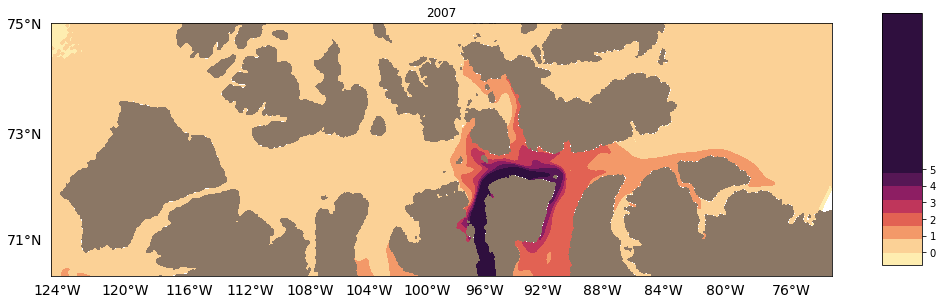

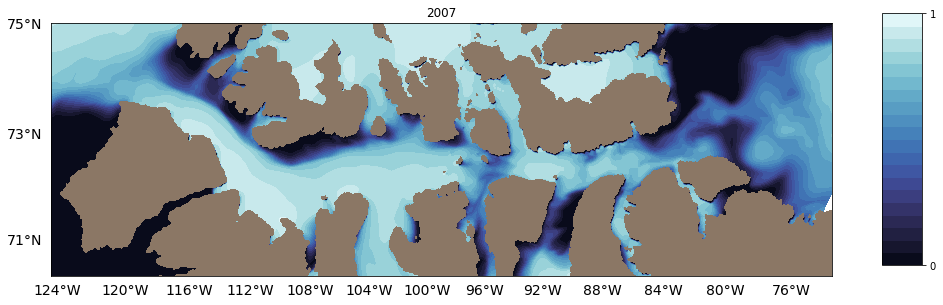

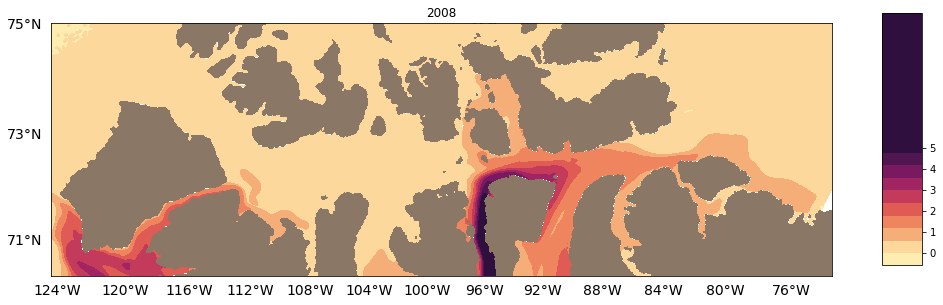

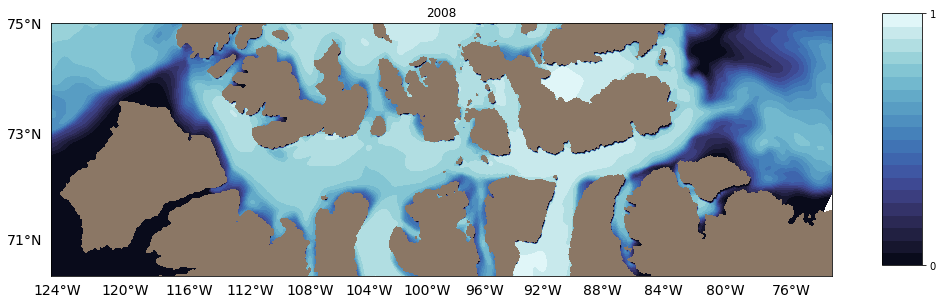

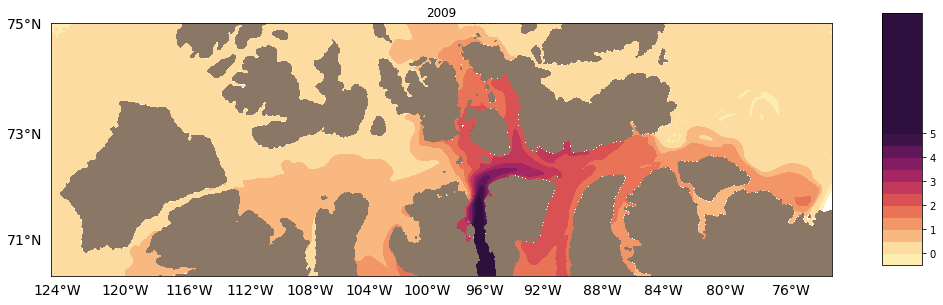

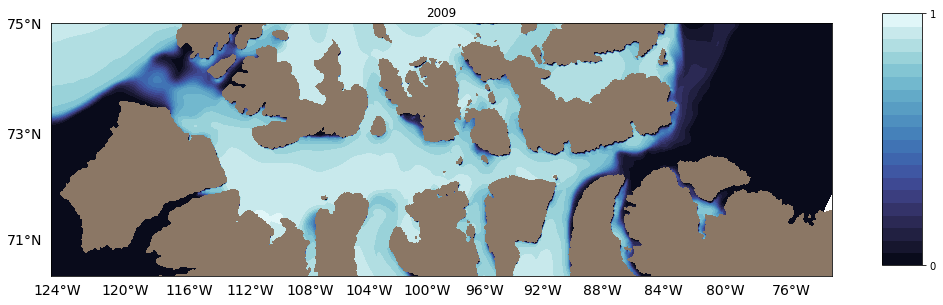

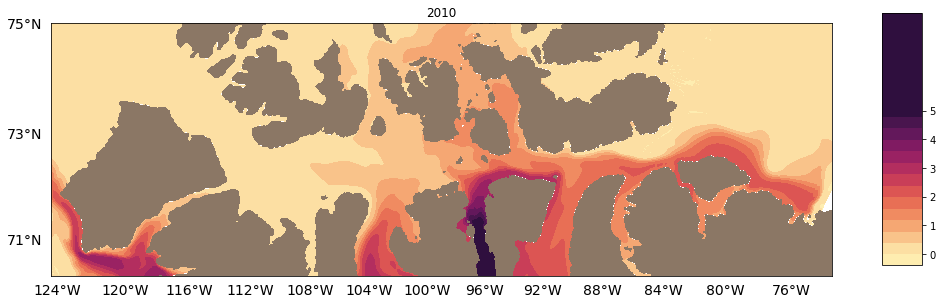

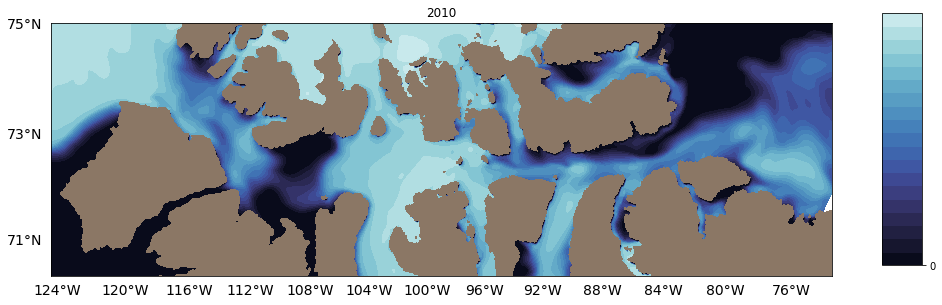

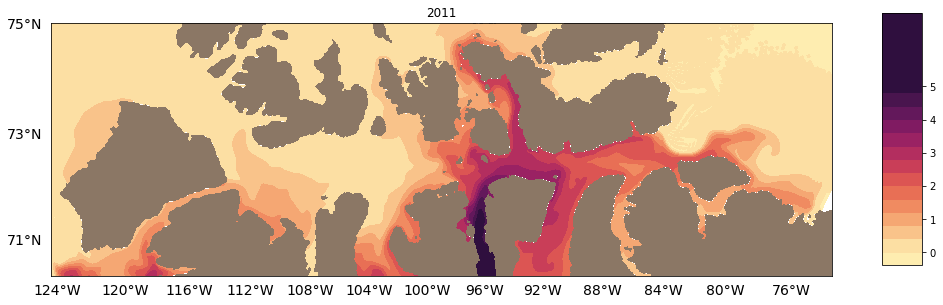

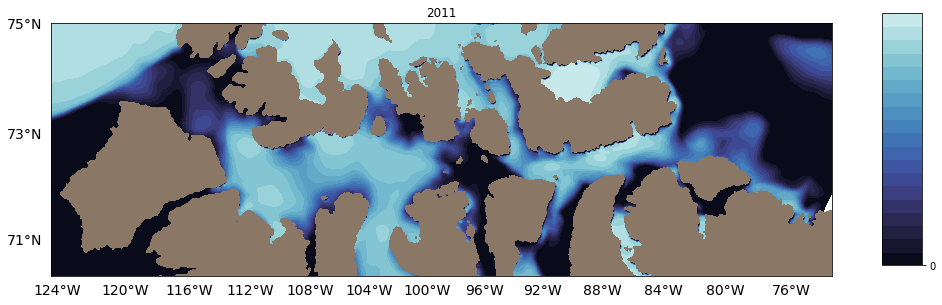

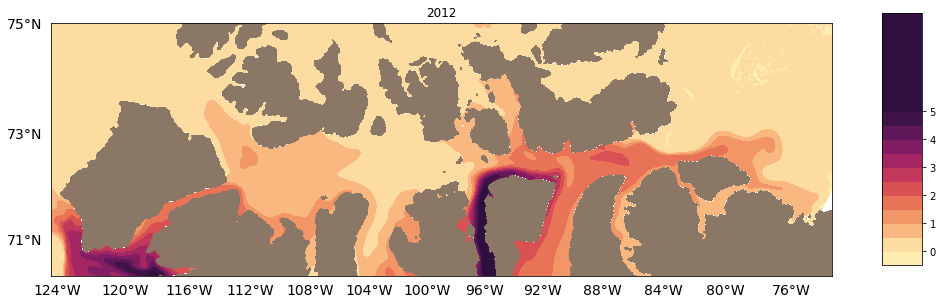

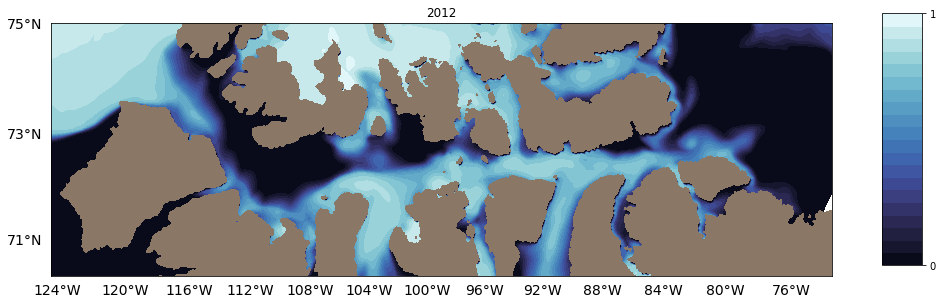

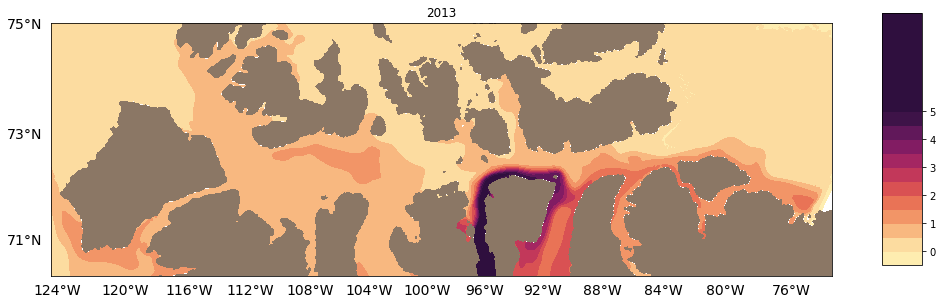

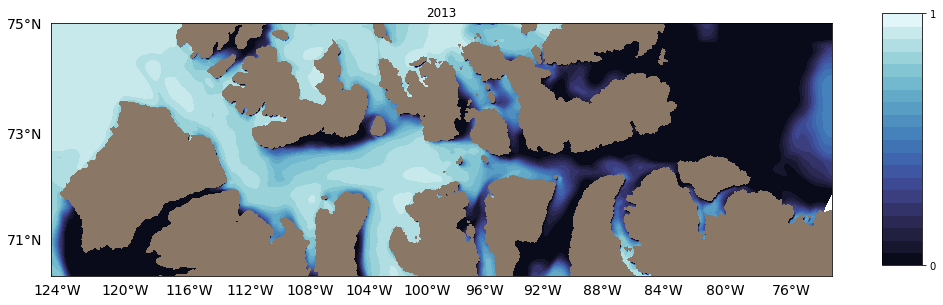

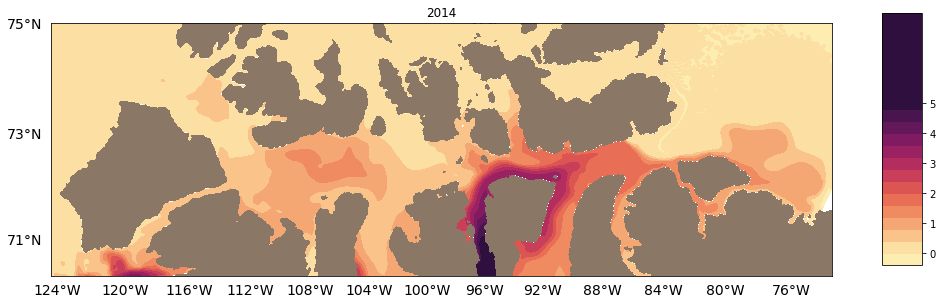

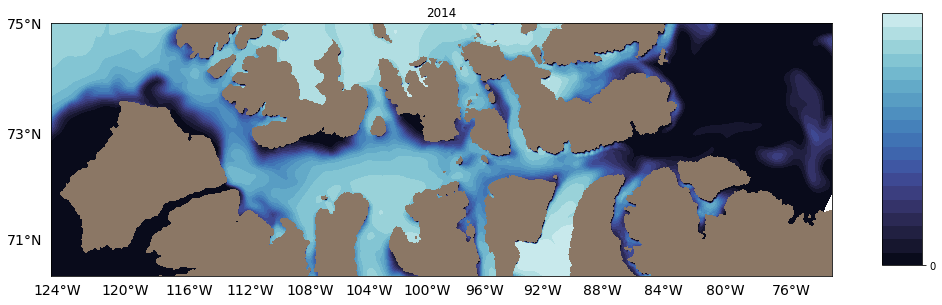

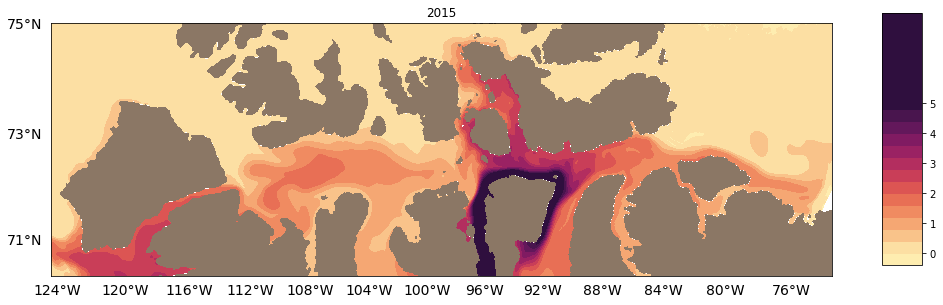

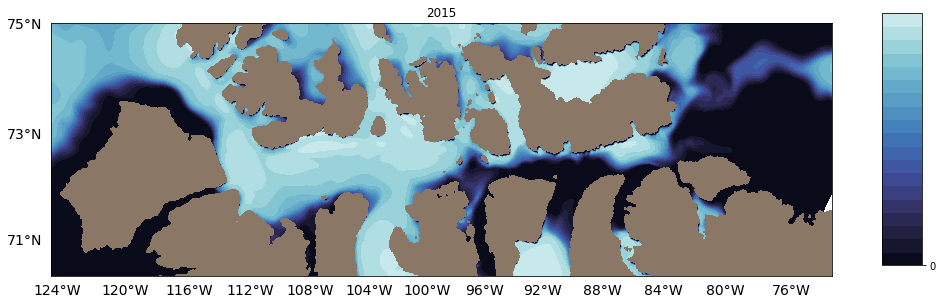

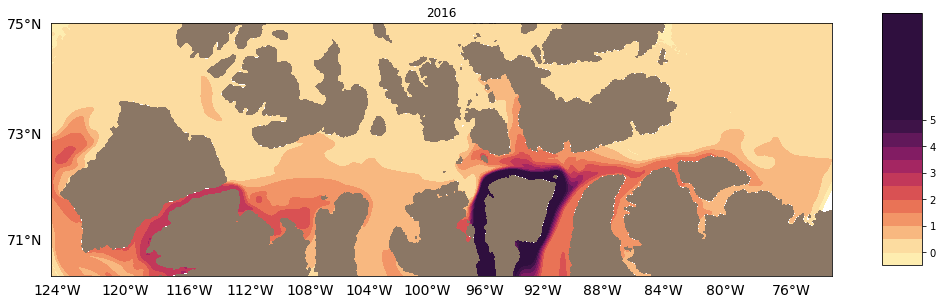

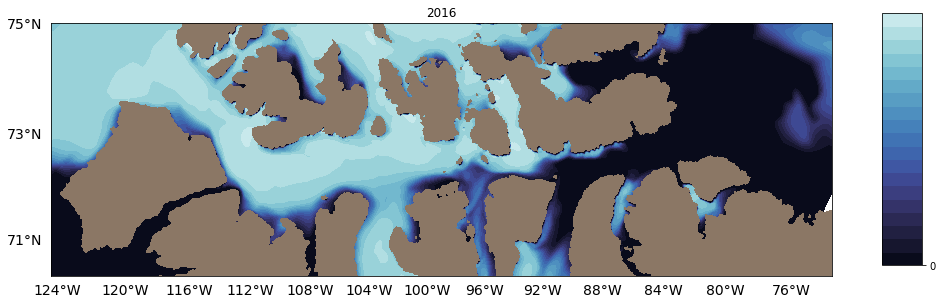

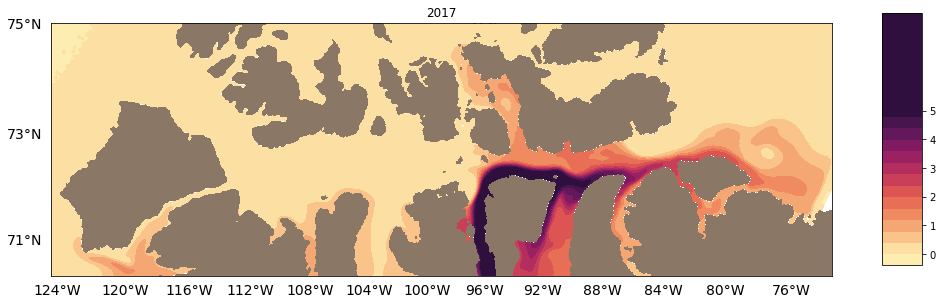

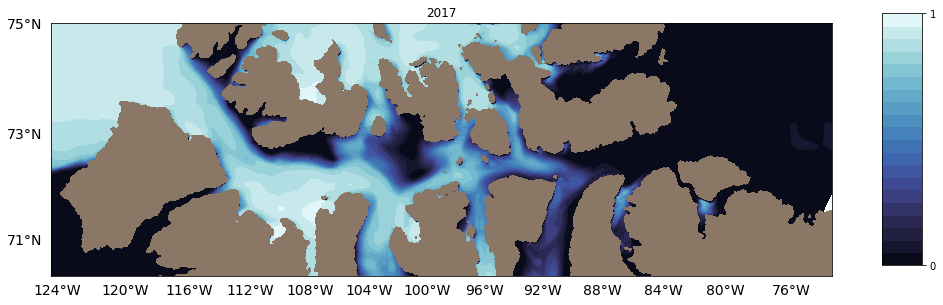

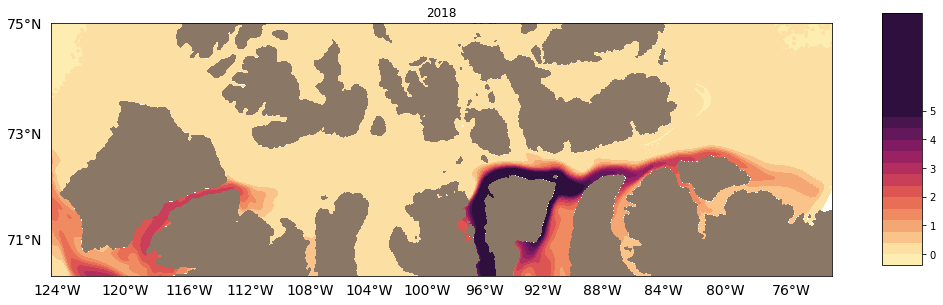

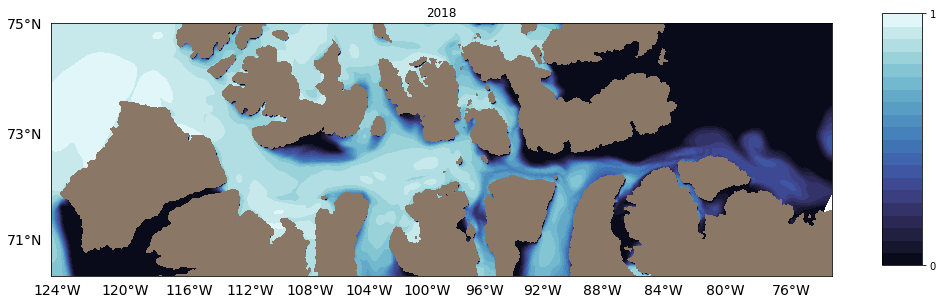

In [21]:
n=0
year=['2007','2008','2009','2010','2011','2012','2013',\
      '2014','2015','2016','2017','2018']

for file in [filei7, filei8, filei9, filei10, filei11, \
             filei12, filei13, filei14, filei15, filei16, filei17, filei18]:
    
    ice_thick, ice_conc = load_variables(file)
    
    if year[n]=='2007':
        plot_surface(cont_2007, '2007')
    elif year[n]=='2008':
        plot_surface(cont_2008, '2008')
    elif year[n]=='2009':
        plot_surface(cont_2009, '2009')
    elif year[n]=='2010':
        plot_surface(cont_2010, '2010')
    elif year[n]=='2011':
        plot_surface(cont_2011, '2011')
    elif year[n]=='2012':
        plot_surface(cont_2012, '2012')
    elif year[n]=='2013':
        plot_surface(cont_2013, '2013')
    elif year[n]=='2014':
        plot_surface(cont_2014, '2014')
    elif year[n]=='2015':
        plot_surface(cont_2015, '2015')
    elif year[n]=='2016':
        plot_surface(cont_2016, '2016')
    elif year[n]=='2017':
        plot_surface(cont_2017, '2017')
    else:
        plot_surface(cont_2018, '2018')
    
    plot_ice(ice_thick, year[n])
    
    n+=1